## Description : This is The Analysis of Agricultural livestock products with Machine Learning.

# Get Started

#### Import the libraries

In [1]:
import pandas as pd # data frames, make easy access and analyze data. We will use this to hold  and manipulate our data 
import os
import statistics
import numpy as np # support scientific computing through dimentional arrays, algebra and numeric capabilities  
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt # to plot data. 2D plot library for publicatio quality grsphics on our data
import sys
# !conda install --yes --prefix {sys.prefix} plotly
from scipy import stats
from scipy.stats import poisson
%matplotlib inline
import scipy 
sns.set_theme (style='darkgrid')
from scipy.stats import kurtosis
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sb

In [2]:
import matplotlib as mpl

# Loading the data

In [3]:
#uploading dataset 
df = pd.read_csv("live animal stock.csv")
df.shape

(4456, 14)

# Undestanding the data

In [66]:
df.head(10)

Domain Code                        Domain  Area Code (M49)    Area  \
0         TCL  Crops and livestock products              250  France   
1         TCL  Crops and livestock products              250  France   
2         TCL  Crops and livestock products              250  France   
3         TCL  Crops and livestock products              250  France   
4         TCL  Crops and livestock products              250  France   
5         TCL  Crops and livestock products              250  France   
6         TCL  Crops and livestock products              250  France   
7         TCL  Crops and livestock products              250  France   
8         TCL  Crops and livestock products              250  France   
9         TCL  Crops and livestock products              250  France   

   Element Code          Element  Item Code (CPC)   Item  Year Code  Year  \
0          5608  Import Quantity           2132.0  Asses       2010  2010   
1          5608  Import Quantity           2132.0  Asses       2011  2011   
2          5608  Import Quantity           2132.0  Asses       2012  2012   
3          5608  Import Quantity           2132.0  Asses       2013  2013   
4          5608  Import Quantity           2132.0  Asses       2014  2014   
5          5608  Import Quantity           2132.0  Asses       2015  2015   
6          5608  Import Quantity           2132.0  Asses       2016  2016   
7          5608  Import Quantity           2132.0  Asses       2017  2017   
8          5608  Import Quantity           2132.0  Asses       2018  2018   
9          5608  Import Quantity           2132.0  Asses       2019  2019   

   Unit  Value Flag Flag Description  
0  Head     41    A  Official figure  
1  Head     55    A  Official figure  
2  Head     34    A  Official figure  
3  Head     56    A  Official figure  
4  Head     27    A  Official figure  
5  Head     30    A  Official figure  
6  Head     16    A  Official figure  
7  Head     24    A  Official figure  
8  Head     19    A  Official figure  
9  Head     26    I    Imputed value

In [67]:
df.tail()

Domain Code                        Domain  Area Code (M49)  \
4451         TCL  Crops and livestock products              840   
4452         TCL  Crops and livestock products              840   
4453         TCL  Crops and livestock products              840   
4454         TCL  Crops and livestock products              840   
4455         TCL  Crops and livestock products              840   

                          Area  Element Code       Element  Item Code (CPC)  \
4451  United States of America          5922  Export Value           2152.0   
4452  United States of America          5922  Export Value           2152.0   
4453  United States of America          5922  Export Value           2152.0   
4454  United States of America          5922  Export Value           2152.0   
4455  United States of America          5922  Export Value           2152.0   

         Item  Year Code  Year      Unit  Value Flag Flag Description  
4451  Turkeys       2017  2017  1000 US$  13025    A  Official figure  
4452  Turkeys       2018  2018  1000 US$  13318    A  Official figure  
4453  Turkeys       2019  2019  1000 US$  12868    A  Official figure  
4454  Turkeys       2020  2020  1000 US$   9888    A  Official figure  
4455  Turkeys       2021  2021  1000 US$  13024    A  Official figure

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4456 entries, 0 to 4455
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       4456 non-null   object 
 1   Domain            4456 non-null   object 
 2   Area Code (M49)   4456 non-null   int64  
 3   Area              4456 non-null   object 
 4   Element Code      4456 non-null   int64  
 5   Element           4456 non-null   object 
 6   Item Code (CPC)   4456 non-null   float64
 7   Item              4456 non-null   object 
 8   Year Code         4456 non-null   int64  
 9   Year              4456 non-null   int64  
 10  Unit              4456 non-null   object 
 11  Value             4456 non-null   int64  
 12  Flag              4456 non-null   object 
 13  Flag Description  4456 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 487.5+ KB


In [69]:
df.nunique() 

Domain Code            1
Domain                 1
Area Code (M49)        8
Area                   8
Element Code           6
Element                4
Item Code (CPC)       17
Item                  17
Year Code             12
Year                  12
Unit                   3
Value               2679
Flag                   4
Flag Description       4
dtype: int64

# Preprocessing the Dataset

In [70]:
# we need to seperate the element column into four columns, then create additional "Net Export Value" column by minus export from import to achieve the targeted column (dependable column)

## Step 1 - Seperating the Element(Import Value)

In [4]:
imp = df[df['Element'].str.count('Import Value') == 1]
print(len(imp['Value']))
imp['id'] = [f'ID_{i+1}' for i in range(len(imp))]
imp.columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Import Value', 'Flag', 'Flag Description','id']
imp = imp.drop(['Domain Code', 'Domain', 'Item Code (CPC)','Area Code (M49)','Area','Element Code', 'Element','Year Code',  'Flag', 'Flag Description'],axis=1)
imp

1253


Item  Year      Unit  Import Value       id
12      Asses  2010  1000 US$            38     ID_1
13      Asses  2011  1000 US$            79     ID_2
14      Asses  2012  1000 US$            47     ID_3
15      Asses  2013  1000 US$            69     ID_4
16      Asses  2014  1000 US$            40     ID_5
...       ...   ...       ...           ...      ...
4427  Turkeys  2017  1000 US$         32128  ID_1249
4428  Turkeys  2018  1000 US$         32602  ID_1250
4429  Turkeys  2019  1000 US$         27920  ID_1251
4430  Turkeys  2020  1000 US$         27132  ID_1252
4431  Turkeys  2021  1000 US$         29935  ID_1253

[1253 rows x 5 columns]

# Step 2 - Seperating the Element(Export Value)

In [5]:
exp = df[df['Element'].str.count('Export Value') == 1]
exp['id'] = [f'ID_{i+1}' for i in range(len(exp))]
exp.columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Export Value', 'Flag', 'Flag Description','id']
exp = exp.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit','Flag', 'Flag Description'],axis=1)
exp

Export Value       id
36              12     ID_1
37              18     ID_2
38               5     ID_3
39               4     ID_4
40              11     ID_5
...            ...      ...
4451         13025  ID_1124
4452         13318  ID_1125
4453         12868  ID_1126
4454          9888  ID_1127
4455         13024  ID_1128

[1128 rows x 2 columns]

# Step 3 - Seperating the Element(Export Quatity)

In [6]:
exp_q = df[df['Element'].str.count('Export Quantity') == 1]
exp_q['id'] = [f'ID_{i+1}' for i in range(len(exp_q))]
exp_q.columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Export Quantity', 'Flag', 'Flag Description','id']
exp_q = exp_q.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit','Flag', 'Flag Description'],axis=1)
exp_q

Export Quantity      id
24                  5    ID_1
25                 16    ID_2
26                  4    ID_3
27                  8    ID_4
28                 36    ID_5
...               ...     ...
4439            10458  ID_975
4440             9756  ID_976
4441             6043  ID_977
4442             4857  ID_978
4443             5914  ID_979

[979 rows x 2 columns]

# Step 4 - Seperating the Element(Import Quantity)

In [7]:
imp_q = df[df['Element'].str.count('Import Quantity') == 1]
imp_q['id'] = [f'ID_{i+1}' for i in range(len(imp_q))]
imp_q.columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Import Quantity', 'Flag', 'Flag Description','id']
imp_q = imp_q.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit','Flag', 'Flag Description'],axis=1)
imp_q

Area  Import Quantity       id
0                       France               41     ID_1
1                       France               55     ID_2
2                       France               34     ID_3
3                       France               56     ID_4
4                       France               27     ID_5
...                        ...              ...      ...
4415  United States of America             7574  ID_1092
4416  United States of America            17397  ID_1093
4417  United States of America             9735  ID_1094
4418  United States of America            17096  ID_1095
4419  United States of America            17506  ID_1096

[1096 rows x 3 columns]

# Step 5 - Creating a new data by merging the Import and the Export data together.

In [8]:
#merging data on unique id using inner join
data = pd.merge(imp,exp,on='id',how='inner')
data = pd.merge(data,imp_q,on='id',how='inner')
data = pd.merge(data,exp_q,on='id',how='inner')
data.shape

(979, 9)

In [9]:
data.head()

Item  Year      Unit  Import Value    id  Export Value    Area  \
0  Asses  2010  1000 US$            38  ID_1            12  France   
1  Asses  2011  1000 US$            79  ID_2            18  France   
2  Asses  2012  1000 US$            47  ID_3             5  France   
3  Asses  2013  1000 US$            69  ID_4             4  France   
4  Asses  2014  1000 US$            40  ID_5            11  France   

   Import Quantity  Export Quantity  
0               41                5  
1               55               16  
2               34                4  
3               56                8  
4               27               36

# Step 6 - Adding a new feature to the data

In [10]:
#adding new column of net export to the data
data['Net Export Value'] = data['Export Value'] - data['Import Value']
data.head(10)

Item  Year      Unit  Import Value     id  Export Value    Area  \
0  Asses  2010  1000 US$            38   ID_1            12  France   
1  Asses  2011  1000 US$            79   ID_2            18  France   
2  Asses  2012  1000 US$            47   ID_3             5  France   
3  Asses  2013  1000 US$            69   ID_4             4  France   
4  Asses  2014  1000 US$            40   ID_5            11  France   
5  Asses  2015  1000 US$           290   ID_6            18  France   
6  Asses  2016  1000 US$            14   ID_7             7  France   
7  Asses  2017  1000 US$            38   ID_8            17  France   
8  Asses  2018  1000 US$            16   ID_9             7  France   
9  Asses  2019  1000 US$            20  ID_10            50  France   

   Import Quantity  Export Quantity  Net Export Value  
0               41                5               -26  
1               55               16               -61  
2               34                4               -42  
3               56                8               -65  
4               27               36               -29  
5               30               49              -272  
6               16               16                -7  
7               24               28               -21  
8               19                9                -9  
9               26               25                30

# Dashboard Section

In [ ]:
# Values    
fig1 = px.bar(x=data['Area'], y=data['Export Value'], title="Export Value analysis for each country")
fig1.show();   


In [ ]:
fig4 = px.bar(y=data['Export Value'], x=data['Year'], color=data['Area'], title='Yearly Export Value of all Countries specified')
fig4.show();

In [ ]:
fig2 = px.bar(x=data['Area'], y=data['Import Value'], title="Import Value analysis for each country")
fig2.show();

In [ ]:
fig3 = px.bar(y=data['Import Value'], x=data['Year'], color=data['Area'], title='Yearly Import Value of all Countries specified')
fig3.show();

In [ ]:
fig1 = px.bar(x=data['Area'], y=data['Export Quantity'], title="Export Quantity analysis for each country")
fig1.show();

In [ ]:
fig4 = px.bar(y=data['Export Quantity'], x=data['Year'], color=data['Area'], title='Yearly Export Quantity of all Countries specified')
fig4.show();

In [ ]:
fig2 = px.bar(x=data['Area'], y=data['Import Quantity'], title="Import Quantity analysis for each country")
fig2.show();

In [ ]:
table_data = pd.DataFrame()
table_data['Items'] = data.groupby('Area')['Net Export Value'].mean().index
table_data['Total Frequency'] = data.groupby('Area')['Net Export Value'].mean().values
    

fig = ff.create_table(table_data, height_constant=60)

Items = data.groupby('Area')['Net Export Value'].mean().index
Total_Frequency = data.groupby('Area')['Net Export Value'].mean().values

trace1 = go.Bar(x=Items, y=Total_Frequency,
                    marker=dict(color='#0099ff'),
                    name='Total frequency of all crops',
                    xaxis='x2', yaxis='y2')


fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Net Export Value'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})


# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
fig.layout.update({'height':800})


fig.show();    



In [ ]:
table_data = pd.DataFrame()
table_data['Items'] = data['Item'].value_counts().index
table_data['Total Frequency'] = data['Item'].value_counts().values
    

fig = ff.create_table(table_data, height_constant=60)

Items = data['Item'].value_counts().index
Total_Frequency = data['Item'].value_counts().values

trace1 = go.Bar(x=Items, y=Total_Frequency,
                    marker=dict(color='#0099ff'),
                    name='Total frequency of all crops',
                    xaxis='x2', yaxis='y2')


fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Total frequency of all crops'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})


# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
fig.layout.update({'height':800})

fig.show();

# Exploratory Data Analysis

In [78]:
#viewing colums heading 
data.columns.values.tolist()

['Item',
 'Year',
 'Unit',
 'Import Value',
 'id',
 'Export Value',
 'Area',
 'Import Quantity',
 'Export Quantity',
 'Net Export Value']

In [112]:
data.isnull().sum()

Item                0
Year                0
Unit                0
Import Value        0
id                  0
Export Value        0
Area                0
Import Quantity     0
Export Quantity     0
Net Export Value    0
dtype: int64

In [11]:
#exploring the dataset insight and paterns
# Summary statistics
data.describe().T

count           mean           std        min     25%  \
Year              979.0    2015.605720  3.422500e+00     2010.0  2013.0   
Import Value      979.0   57379.964249  2.213191e+05        0.0    33.0   
Export Value      979.0   62865.331971  2.070719e+05        0.0    11.0   
Import Quantity   979.0  279270.930541  1.538740e+06        0.0    24.0   
Export Quantity   979.0  131888.379980  4.129424e+05        0.0    16.0   
Net Export Value  979.0    5485.367722  3.049943e+05 -1726311.0 -3730.0   

                     50%      75%         max  
Year              2016.0   2019.0      2021.0  
Import Value       788.0  21170.0   1766278.0  
Export Value       481.0  25723.0   1983630.0  
Import Quantity   1052.0  25426.0  15542605.0  
Export Quantity    694.0  21203.5   3512535.0  
Net Export Value    -1.0  12292.0   1983591.0

### Oservation:
Looking at the above variables, it is easy for us to detect something is not right, there is outliers resulting from incorrect data. 
The minimum and maximum are 0, and, 1766278.0, 1983630.0, 15542605.0 and 3512535.0  respectively. 
These are incorrect, and must be treated as we go in this analysis later as we mathematical and visualization techniques.

In [23]:
# list of livestock agriculture products tha we have in the data
crop_names = data['Item'].unique()
print(crop_names)

# how many types of livestock products are there in the dataset
print(data['Item'].unique().shape)

['Asses' 'Camels' 'Cattle' 'Chickens' 'Ducks' 'Geese' 'Goats' 'Horses'
 'Mules and hinnies' 'Other live animals non food, n.e.c.'
 'Other live animals, n.e.c.' 'Rabbits and hares' 'Sheep' 'Swine / pigs'
 'Turkeys' 'Buffalo' 'Other rodents']
(17,)


### which livestock products is most traded one?

In [24]:
data['Item'].value_counts()

Cattle                                 84
Chickens                               84
Sheep                                  72
Asses                                  71
Horses                                 70
Other live animals non food, n.e.c.    68
Swine / pigs                           67
Goats                                  66
Ducks                                  65
Turkeys                                61
Other live animals, n.e.c.             60
Mules and hinnies                      54
Rabbits and hares                      52
Camels                                 38
Buffalo                                35
Geese                                  30
Other rodents                           2
Name: Item, dtype: int64

In [25]:
#save item dis as crops and crops dis for later visualisatin
crops = data['Item'].value_counts().index

In [26]:
crops_value = data['Item'].value_counts().values

In [552]:
data['Area'].value_counts()

France                      132
Italy                       113
Spain                       109
Germany                     100
Ireland                      66
Ghana                        46
Nigeria                      39
United States of America     31
Name: Area, dtype: int64

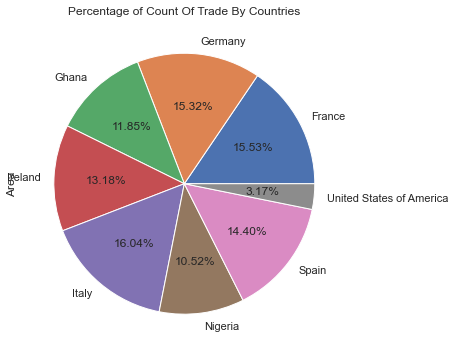

In [66]:
# pie chart using groupby
# which country have maximum trade
matplotlib.rcParams['figure.figsize'] = (12, 6)
data.groupby('Area').Area.count().plot(kind='pie', autopct = '%1.2f%%')
plt.title("Percentage of Count Of Trade By Countries")
plt.show()

### Observation:
Italy has the highest trade percentage count and USA with the lowest.

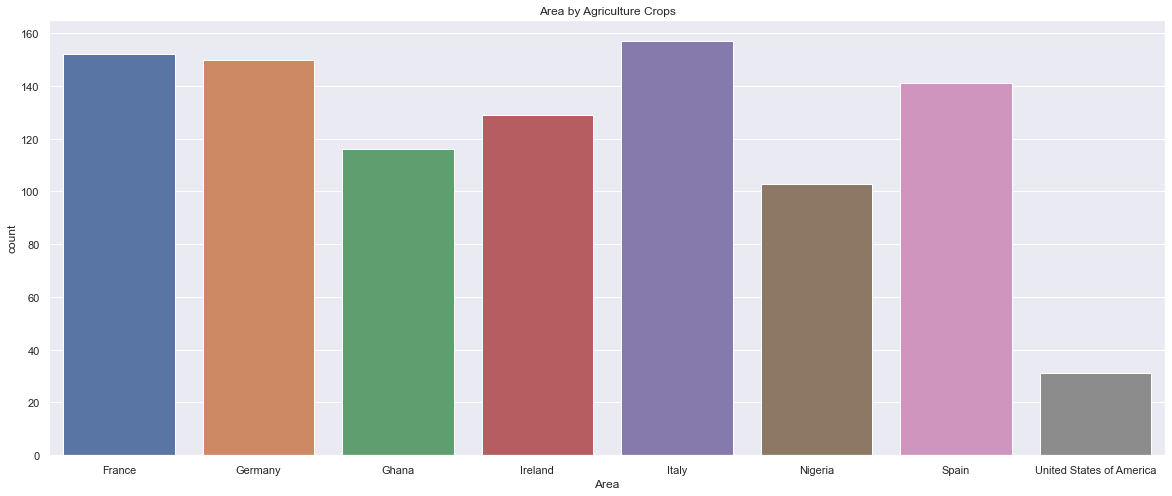

In [67]:
#frequency of countries trade
plt.figure(figsize=(20,8))
plt.title("Area by Agriculture Crops")                                    
plt.xlabel("Countries")
plt.ylabel("Frequency")
sns.countplot(x=data['Area']);

### Observation:
highest frequency of trade transation is from Italy, followed by France and Germany in 2nd and 3rd position  Span is in 4th position. Ireland 5th position. Ghana and Nigeria, 6th, 7th position respectively. USA has the lowest transaction

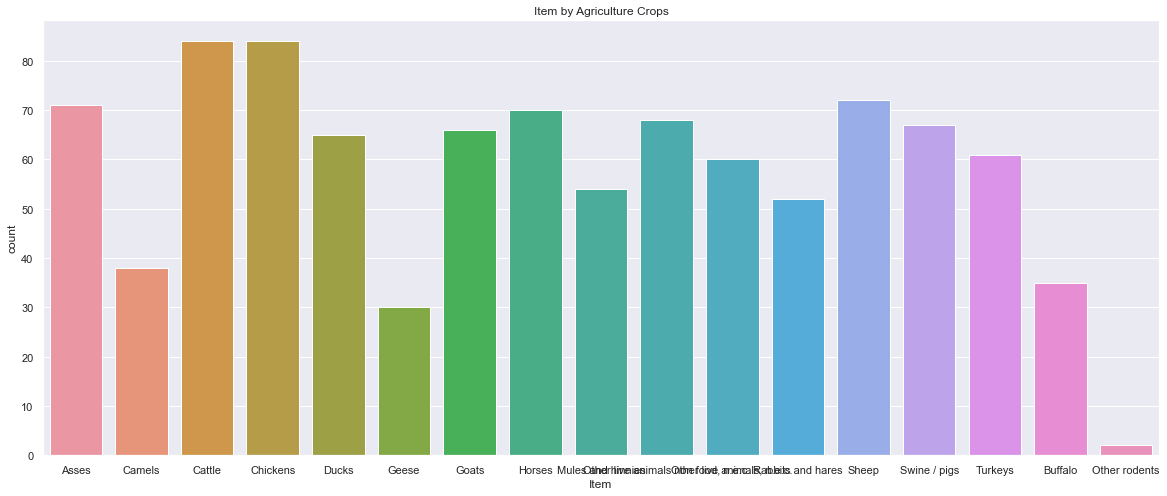

In [69]:
#frequency of countries trade
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt.figure(figsize=(20,8))
plt.title("Item by Agriculture Crops")                                    
plt.xlabel("Traded Live Animals")
plt.ylabel("Frequency")
sns.countplot(x=data['Item']);

### Which livestock is the most traded livestock and by which country?

<AxesSubplot:title={'center':'Five Most Traded livestock'}>

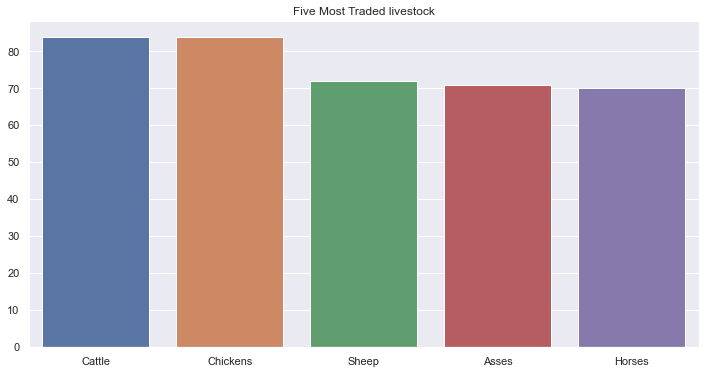

In [70]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt.title("Five Most Traded livestock")
sns.barplot(x=crops[:5], y=crops_value[:5])

In [65]:
pd.crosstab(data.Area,data.Item)

Item                      Asses  Buffalo  Camels  Cattle  Chickens  Ducks  \
Area                                                                        
France                       12        0      10      12        12     12   
Germany                      12        3      10      12        12     12   
Ghana                         5        5       3      12        12      8   
Ireland                       9        4       2      12        12      8   
Italy                        12       11       7      12        12     12   
Nigeria                       0        0       0       0         0      0   
Spain                        21       12       6      16        12      2   
United States of America      0        0       0       8        12     11   

Item                      Geese  Goats  Horses  Mules and hinnies  \
Area                                                                
France                        8     12      12                 12   
Germany                       8     12      12                  9   
Ghana                         4     11      12                  1   
Ireland                       2      7       7                  6   
Italy                         3      0       5                 12   
Nigeria                       5     12      12                 11   
Spain                         0     12      10                  3   
United States of America      0      0       0                  0   

Item                      Other live animals non food, n.e.c.  \
Area                                                            
France                                                     12   
Germany                                                    12   
Ghana                                                       0   
Ireland                                                    12   
Italy                                                      12   
Nigeria                                                    12   
Spain                                                       8   
United States of America                                    0   

Item                      Other live animals, n.e.c.  Other rodents  \
Area                                                                  
France                                            12              0   
Germany                                            9              0   
Ghana                                              0              0   
Ireland                                           11              0   
Italy                                             12              0   
Nigeria                                            4              0   
Spain                                             12              2   
United States of America                           0              0   

Item                      Rabbits and hares  Sheep  Swine / pigs  Turkeys  
Area                                                                       
France                                   12     12             2        0  
Germany                                   5      0            10       12  
Ghana                                     7     12            12       12  
Ireland                                   5     12             9       11  
Italy                                    11     12            12       12  
Nigeria                                  12     12            12       11  
Spain                                     0     12            10        3  
United States of America                  0      0             0        0

### Observation: 
Chicken is the most traded livestocks, then cattle, ducks e.t.c..
Nigeria is not trading in the first five livestock; the USA is not trading in the first three livestock.
France, Germany, Ghana, Ireland, Spain, and Italy are the most trading countries in the first five livestock

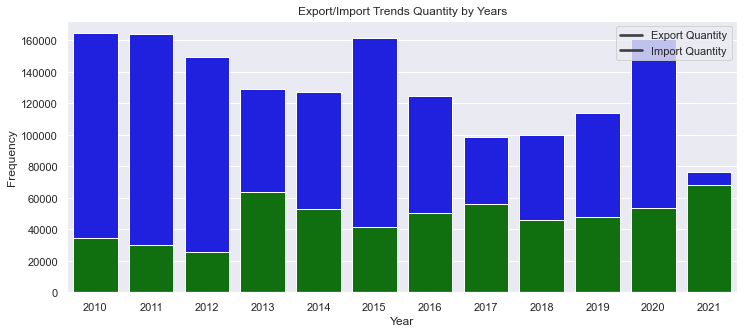

In [242]:
#frequency of countries trade
plt.figure(figsize=(12,5))
plt.title("Export/Import Trends Quantity by Years")                                    
plt.xlabel("Years")
plt.ylabel("Frequency")
grp1 = data.groupby('Year')['Export Quantity'].mean()
grp2 = data.groupby('Year')['Import Value'].mean()
sns.barplot(x=grp1.index, y=grp1.values, color='blue');
sns.barplot(x=grp2.index, y=grp2.values, color='green');
plt.legend(['Export Quantity','Import Quantity'])


vaplt.show()

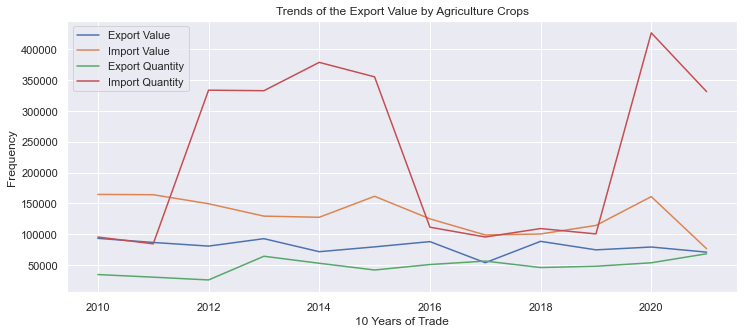

In [240]:
#frequency of countries trade
plt.figure(figsize=(12,5))
plt.title("Trends of the Export Value by Agriculture Crops")                                    
plt.xlabel("10 Years of Trade")
plt.ylabel("Frequency")
grp1 = data.groupby('Year')['Export Value'].mean()
grp3 = data.groupby('Year')['Import Value'].mean()
grp2 = data.groupby('Year')['Export Quantity'].mean()
grp4 = data.groupby('Year')['Import Quantity'].mean()
sns.lineplot(x=grp1.index, y=grp1.values);
sns.lineplot(x=grp2.index, y=grp2.values);
sns.lineplot(x=grp3.index, y=grp3.values);
sns.lineplot(x=grp3.index, y=grp4.values);
plt.legend(['Export Value', 'Import Value','Export Quantity', 'Import Quantity' ])


plt.show()

### Observation:
2017 and 2021 has the import higher than the export which is TRADE DEFICIT in that year for such country in 2017 and 2021. We will visualise those countries in the below 

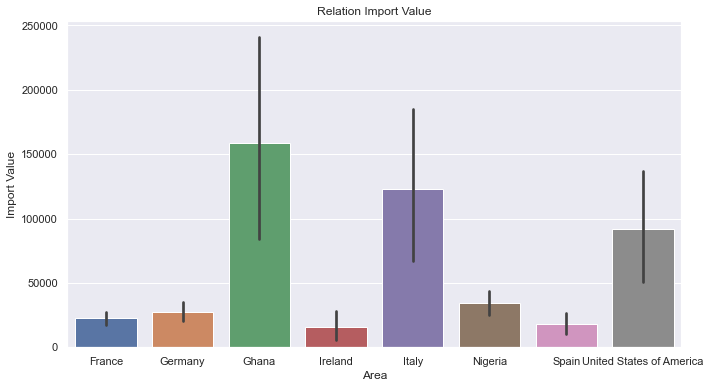

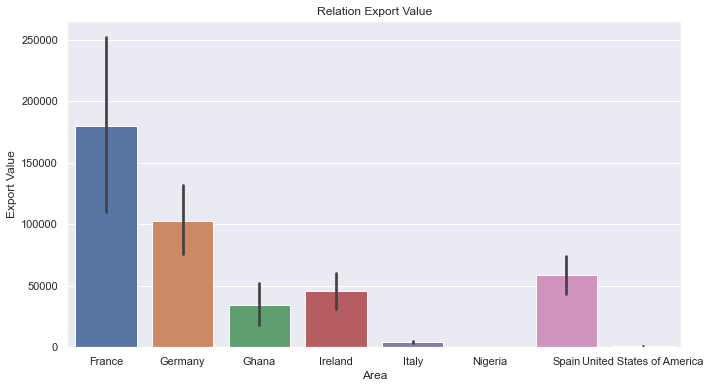

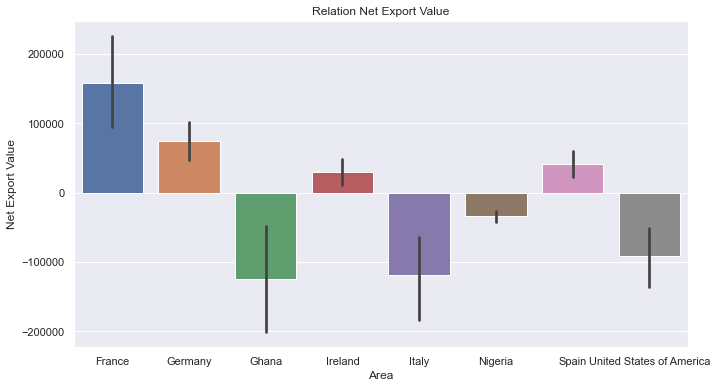

In [97]:
#visualising import, export and net export value
cols = ['Import Value','Export Value','Net Export Value']
def generate_barplot(cols):
    for col in cols:
        plt.figure(figsize=(11,6))
        plt.title(f'Relation {col}')
        sns.barplot(x=data['Area'], y=data[col])
        plt.show()
        
generate_barplot(cols)

### Observation:
Trade Export minus Trade Import equal Net Trade Value (BOT=Exports−Imports). This depends on whether is minus (trade deficit or negative trade balance) or plus (trade surplus).
When Export is more than Import like in the visual above it's called Trade surplus also known as positive trade balance.

Looking at the above EDA of eight livestock trades. Ireland falls into number four of the country that is doing well. France being number one,Germany is number 2 and Spain is number three. The rest three countries falls into trade deficity category 

# Visualising For Outliers

<AxesSubplot:xlabel='Net Export Value', ylabel='Area'>

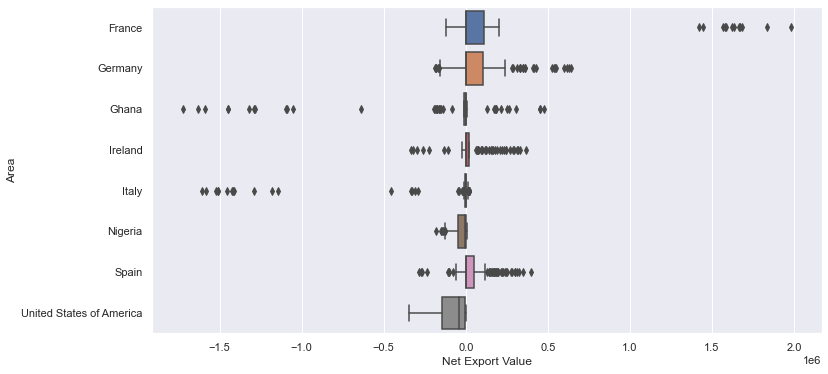

In [30]:
sb.boxplot(x='Net Export Value', y='Area', data=data)

### Observation:
All countries have data points beyond their whiskers except for USA with small data.

### Observation:
From the EDA we observed that 

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Export Value'>

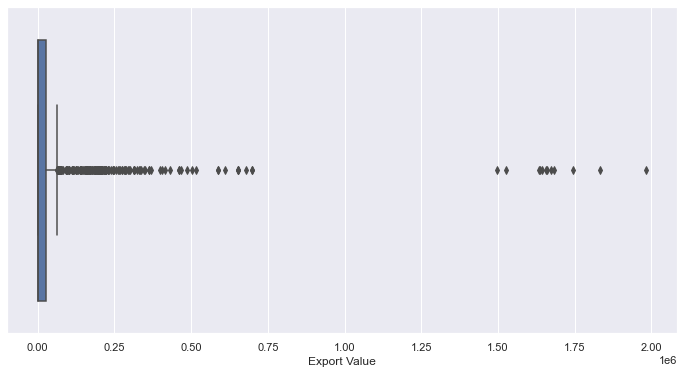

In [32]:
# Box Plot
import seaborn as sns
sns.boxplot(data['Export Value'])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Import Value'>

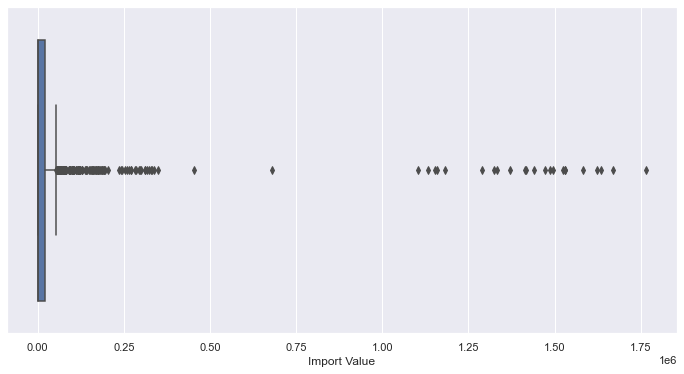

In [33]:
# Box Plot
sns.boxplot(data['Import Value'])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Export Quantity'>

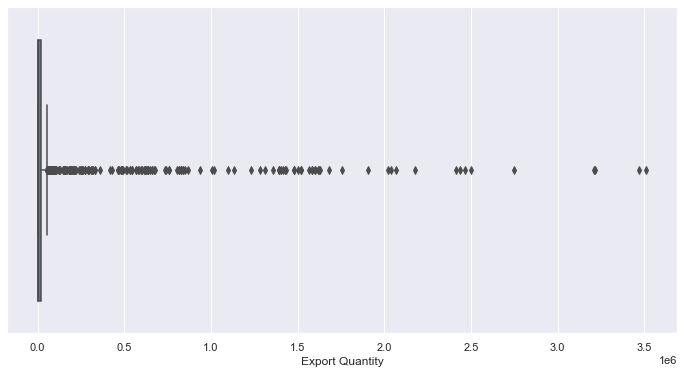

In [34]:
# Box Plot
sns.boxplot(data['Export Quantity'])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Import Quantity'>

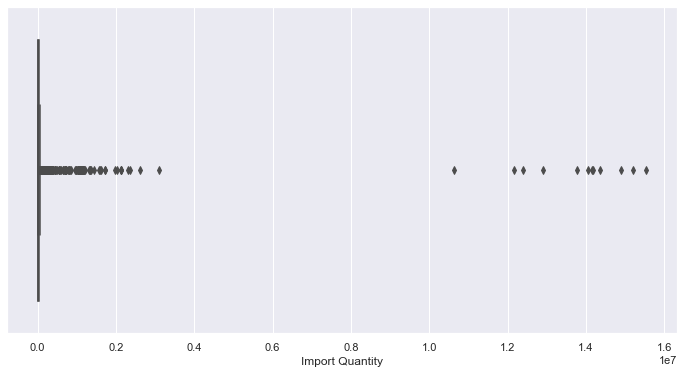

In [35]:
# Box Plot
sns.boxplot(data['Import Quantity'])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Net Export Value'>

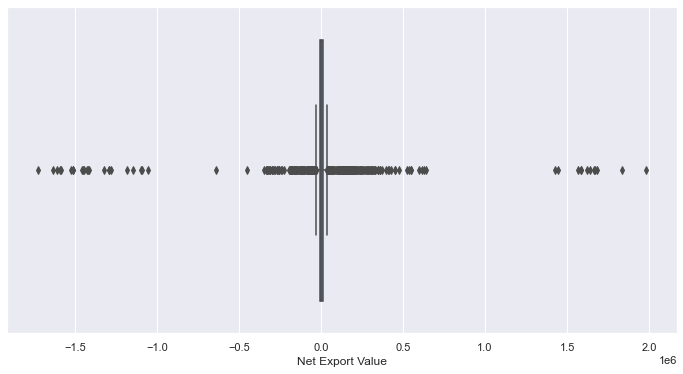

In [36]:
# Box Plot
sns.boxplot(data['Net Export Value'])

In [39]:
import plotly.graph_objects as go
import plotly.express as px

In [38]:
# plot distribution
#ax = sns.displot(kind='kde', data=data, col='Year', col_wrap=3, x='Net Export Value', hue='Area', fill=True, facet_kws={'sharey': False, 'sharex': False})
#ax.set(title='Net Export Value by Year')

In [12]:
px.histogram(data_frame = data
             , x = 'Net Export Value'
             ,color_discrete_sequence = ['darkred']
             )

In [13]:
fig = px.histogram(data, x='Net Export Value')

fig.show()

In [14]:
fig = px.histogram(data, x='Export Value')

fig.show()

In [15]:
fig = px.histogram(data, x='Import Value')

fig.show()

In [16]:
fig = px.histogram(data, x='Export Quantity')

fig.show()

In [17]:
fig = px.histogram(data, x='Import Quantity')

fig.show()

### Observation:
There are presence of outliers in the data.
The outliers need to dealt with befor we move on to the next stage by removing otherwise they can distort statistical analyses and violate their assumptions. 
Outliers increase the variability of data, which decreases statistical power. thus, excluding outliers can cause your results to become statistically significant.
Outlier will be remove using IQR by defining the area value known as factor K: IQR below the 25th percentile or above the 75th percentile

# Data Cleaning

In [114]:
#checking for zero value in the columns
print (data.eq(0).any())

Item                False
Year                False
Unit                False
Import Value         True
id                  False
Export Value         True
Area                False
Import Quantity      True
Export Quantity      True
Net Export Value     True
dtype: bool


### Observation:
All zero value in the data represent that there are no trade on the date therefor, we will remove them as they are not usefl in the analysis

In [18]:
#some of the value column are 0, we need to remove them as the are not useful for this analysis. (It means zero transation occured for such agriculture crops in "item column") 
data.loc[(data[['Import Value', 'Export Value', 'Import Quantity', 'Export Quantity', 'Net Export Value' ]] != 0).all(axis=1)]

Item  Year      Unit  Import Value      id  Export Value  \
0    Asses  2010  1000 US$            38    ID_1            12   
1    Asses  2011  1000 US$            79    ID_2            18   
2    Asses  2012  1000 US$            47    ID_3             5   
3    Asses  2013  1000 US$            69    ID_4             4   
4    Asses  2014  1000 US$            40    ID_5            11   
..     ...   ...       ...           ...     ...           ...   
974  Ducks  2016  1000 US$          1405  ID_975            18   
975  Ducks  2017  1000 US$          2190  ID_976           165   
976  Ducks  2018  1000 US$          2745  ID_977           235   
977  Ducks  2019  1000 US$          2410  ID_978           206   
978  Ducks  2020  1000 US$          2069  ID_979           139   

                         Area  Import Quantity  Export Quantity  \
0                      France               41                5   
1                      France               55               16   
2                      France               34                4   
3                      France               56                8   
4                      France               27               36   
..                        ...              ...              ...   
974  United States of America          2141165            10458   
975  United States of America          2033144             9756   
976  United States of America          2358211             6043   
977  United States of America          1985103             4857   
978  United States of America          1708174             5914   

     Net Export Value  
0                 -26  
1                 -61  
2                 -42  
3                 -65  
4                 -29  
..                ...  
974             -1387  
975             -2025  
976             -2510  
977             -2204  
978             -1930  

[636 rows x 10 columns]

In [19]:
data = data.loc[(data[['Import Value', 'Export Value', 'Import Quantity', 'Export Quantity', 'Net Export Value' ]] != 0).all(axis=1)]
data

Item  Year      Unit  Import Value      id  Export Value  \
0    Asses  2010  1000 US$            38    ID_1            12   
1    Asses  2011  1000 US$            79    ID_2            18   
2    Asses  2012  1000 US$            47    ID_3             5   
3    Asses  2013  1000 US$            69    ID_4             4   
4    Asses  2014  1000 US$            40    ID_5            11   
..     ...   ...       ...           ...     ...           ...   
974  Ducks  2016  1000 US$          1405  ID_975            18   
975  Ducks  2017  1000 US$          2190  ID_976           165   
976  Ducks  2018  1000 US$          2745  ID_977           235   
977  Ducks  2019  1000 US$          2410  ID_978           206   
978  Ducks  2020  1000 US$          2069  ID_979           139   

                         Area  Import Quantity  Export Quantity  \
0                      France               41                5   
1                      France               55               16   
2                      France               34                4   
3                      France               56                8   
4                      France               27               36   
..                        ...              ...              ...   
974  United States of America          2141165            10458   
975  United States of America          2033144             9756   
976  United States of America          2358211             6043   
977  United States of America          1985103             4857   
978  United States of America          1708174             5914   

     Net Export Value  
0                 -26  
1                 -61  
2                 -42  
3                 -65  
4                 -29  
..                ...  
974             -1387  
975             -2025  
976             -2510  
977             -2204  
978             -1930  

[636 rows x 10 columns]

# Getting the 25th and 75th percentile to remove outliers

In [20]:
etr = data['Export Value'].describe().to_list()
itr = data['Import Value'].describe().to_list()


eq1, eq2 = etr[4], etr[6]
iq1, iq2 = itr[4], itr[6]
iq1, iq2, eq1, eq2

(76.5, 21906.0, 61.25, 41244.25)

In [21]:
# filtered dataframe
dr = data.where(data['Export Value'] > eq1)
dr = data.where(data['Import Value'] > iq1)
dr = data.where(data['Export Value'] < eq2)
dr = data.where(data['Export Quantity'] > 0)
dr = dr.where(dr['Import Value'] < iq2)
dr.dropna(axis=0, inplace=True)

# New dataframe
d = dr[dr['Export Value'] < 50000]
d['Export Value'] = [int(i) for i in d['Export Value']]
d['Export Quantity'] = [int(i) for i in d['Export Quantity']]
d['Import Value'] = [int(i) for i in d['Import Value']]
d['Import Quantity'] = [int(i) for i in d['Import Quantity']]
d['Net Export Value'] = [int(i) for i in d['Net Export Value']]

# FIlter the outliers
nqr = d['Net Export Value'].describe().to_list()
nq1, nq2 = nqr[4], nqr[6]
d = d.where(d['Net Export Value'] > nq1)
d = d.where(d['Net Export Value'] < nq2)
d.dropna(axis=0, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1404eee5dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1404eefb3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1404eed6970>],
 'medians': [<matplotlib.lines.Line2D at 0x1404eefb940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1404eefbc10>],
 'means': []}

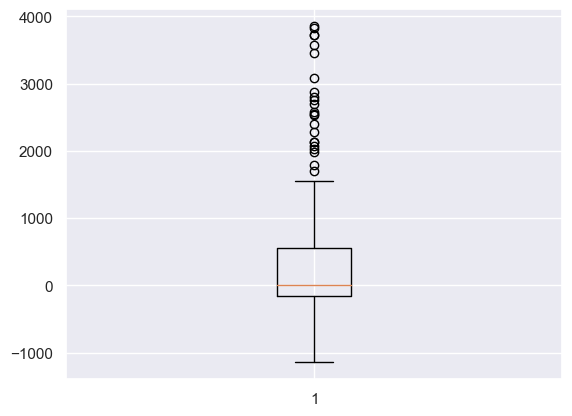

In [22]:
plt.boxplot(d['Net Export Value'])

In [82]:
#for x in ['Year', 'Import Value', 'Export Value', 'Import Quantity', 'Export Quantity', 'Net Export Value']:
  #  q75,q25 = np.percentile(data.loc[:,x],[75,25])
   # intr_qr = q75-q25
 
   # max = q75+(1.5*intr_qr)
    #min = q25-(1.5*intr_qr)
 
    #data.loc[data[x] < min,x] = np.nan
    #data.loc[data[x] > max,x] = np.nan

In [74]:
#DROPPING SOME UNNEEDED COLUMNS
#d = d.drop(['Unit', 'id'], axis=1)
# display the dataframe
#d

# Descriptive Statistics

In [23]:
#getting all variables mean at once
d.mean()

C:\Users\Owner\AppData\Local\Temp\ipykernel_16392\759561128.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Year                 2015.697436
Import Value          418.482051
Export Value          748.035897
Import Quantity     48280.025641
Export Quantity     68598.128205
Net Export Value      329.553846
dtype: float64

In [24]:
#getting all variables median at once
d.median()

C:\Users\Owner\AppData\Local\Temp\ipykernel_16392\231611582.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Year                2016.0
Import Value         101.0
Export Value         126.0
Import Quantity      541.0
Export Quantity      284.0
Net Export Value       7.0
dtype: float64

In [26]:
#getting all variables mode at once
from scipy.stats import mode
mode(d)

ModeResult(mode=array([['Asses', 2014.0, '1000 US$', 3.0, 'ID_1', 2.0, 'France', 1.0,
        6.0, -7.0]], dtype=object), count=array([[ 27,  21, 195,   6,   1,   8,  41,   6,   8,   3]]))

In [27]:
#variance of all column at a go
d.var()

Year                1.132551e+01
Import Value        7.286303e+05
Export Value        1.844139e+06
Import Quantity     3.156682e+10
Export Quantity     2.894231e+10
Net Export Value    1.092539e+06
dtype: float64

In [28]:
#standard Deviation of all column at a go
d.std()

Year                     3.365339
Import Value           853.598449
Export Value          1357.990869
Import Quantity     177670.530018
Export Quantity     170124.393083
Net Export Value      1045.245831
dtype: float64

In [29]:
#skewedness of all variables
print(d.skew())

Year                0.005293
Import Value        4.877152
Export Value        3.078142
Import Quantity     5.651629
Export Quantity     3.028068
Net Export Value    1.586152
dtype: float64


In [30]:
d.kurtosis()

Year                -1.124654
Import Value        31.935673
Export Value        13.042489
Import Quantity     34.086725
Export Quantity      9.004147
Net Export Value     2.367898
dtype: float64

### Observation:


# Inferential statistics

In [25]:
#removing empty spaces in columns
d.columns = d.columns.str.replace(" ", "")
# display the dataframe
d

Item    Year      Unit  ImportValue      id  ExportValue  \
0      Asses  2010.0  1000 US$         38.0    ID_1         12.0   
1      Asses  2011.0  1000 US$         79.0    ID_2         18.0   
2      Asses  2012.0  1000 US$         47.0    ID_3          5.0   
3      Asses  2013.0  1000 US$         69.0    ID_4          4.0   
4      Asses  2014.0  1000 US$         40.0    ID_5         11.0   
..       ...     ...       ...          ...     ...          ...   
940  Buffalo  2018.0  1000 US$         14.0  ID_941        227.0   
941  Buffalo  2019.0  1000 US$          2.0  ID_942        167.0   
943  Buffalo  2021.0  1000 US$          3.0  ID_944        172.0   
968    Ducks  2010.0  1000 US$       2362.0  ID_969       1222.0   
969    Ducks  2011.0  1000 US$       1933.0  ID_970       1533.0   

                         Area  ImportQuantity  ExportQuantity  NetExportValue  
0                      France            41.0             5.0           -26.0  
1                      France            55.0            16.0           -61.0  
2                      France            34.0             4.0           -42.0  
3                      France            56.0             8.0           -65.0  
4                      France            27.0            36.0           -29.0  
..                        ...             ...             ...             ...  
940                     Spain          4744.0            50.0           213.0  
941                     Spain          5536.0            59.0           165.0  
943                     Spain          3930.0        151602.0           169.0  
968  United States of America         23084.0          7622.0         -1140.0  
969  United States of America            12.0          6460.0          -400.0  

[195 rows x 10 columns]

# 1 Normality

<Figure size 640x480 with 0 Axes>

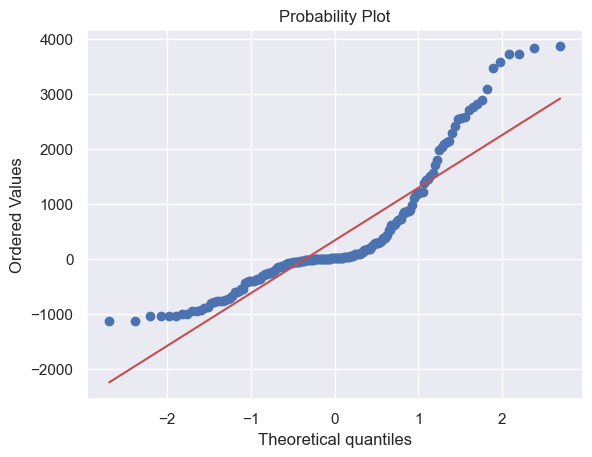

<Figure size 640x480 with 0 Axes>

In [26]:
#Checking normality with a plot
stats.probplot(d.NetExportValue, plot = plt)
plt.figure()

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log



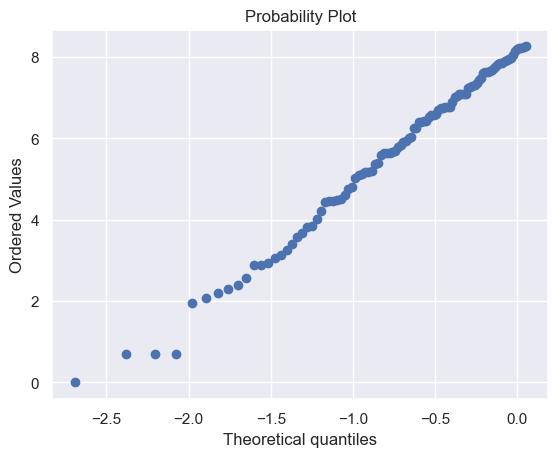

In [27]:
# use scipy.stats to plot against a norm
stats.probplot(np.log(d['NetExportValue']), dist="norm", plot=plt);

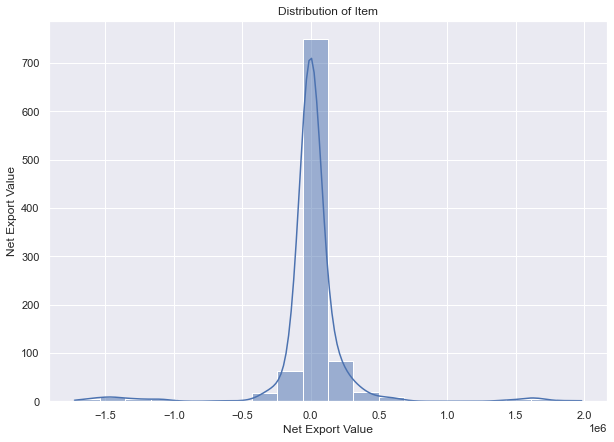

In [189]:
#Plot a histogram using the "Net Export Value" column our target variable
plt.figure(figsize=[10,7])
sns.histplot(data=data,x="Net Export Value",bins=20,kde=True).set(title="Distribution of Item",ylabel="Net Export Value")
plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



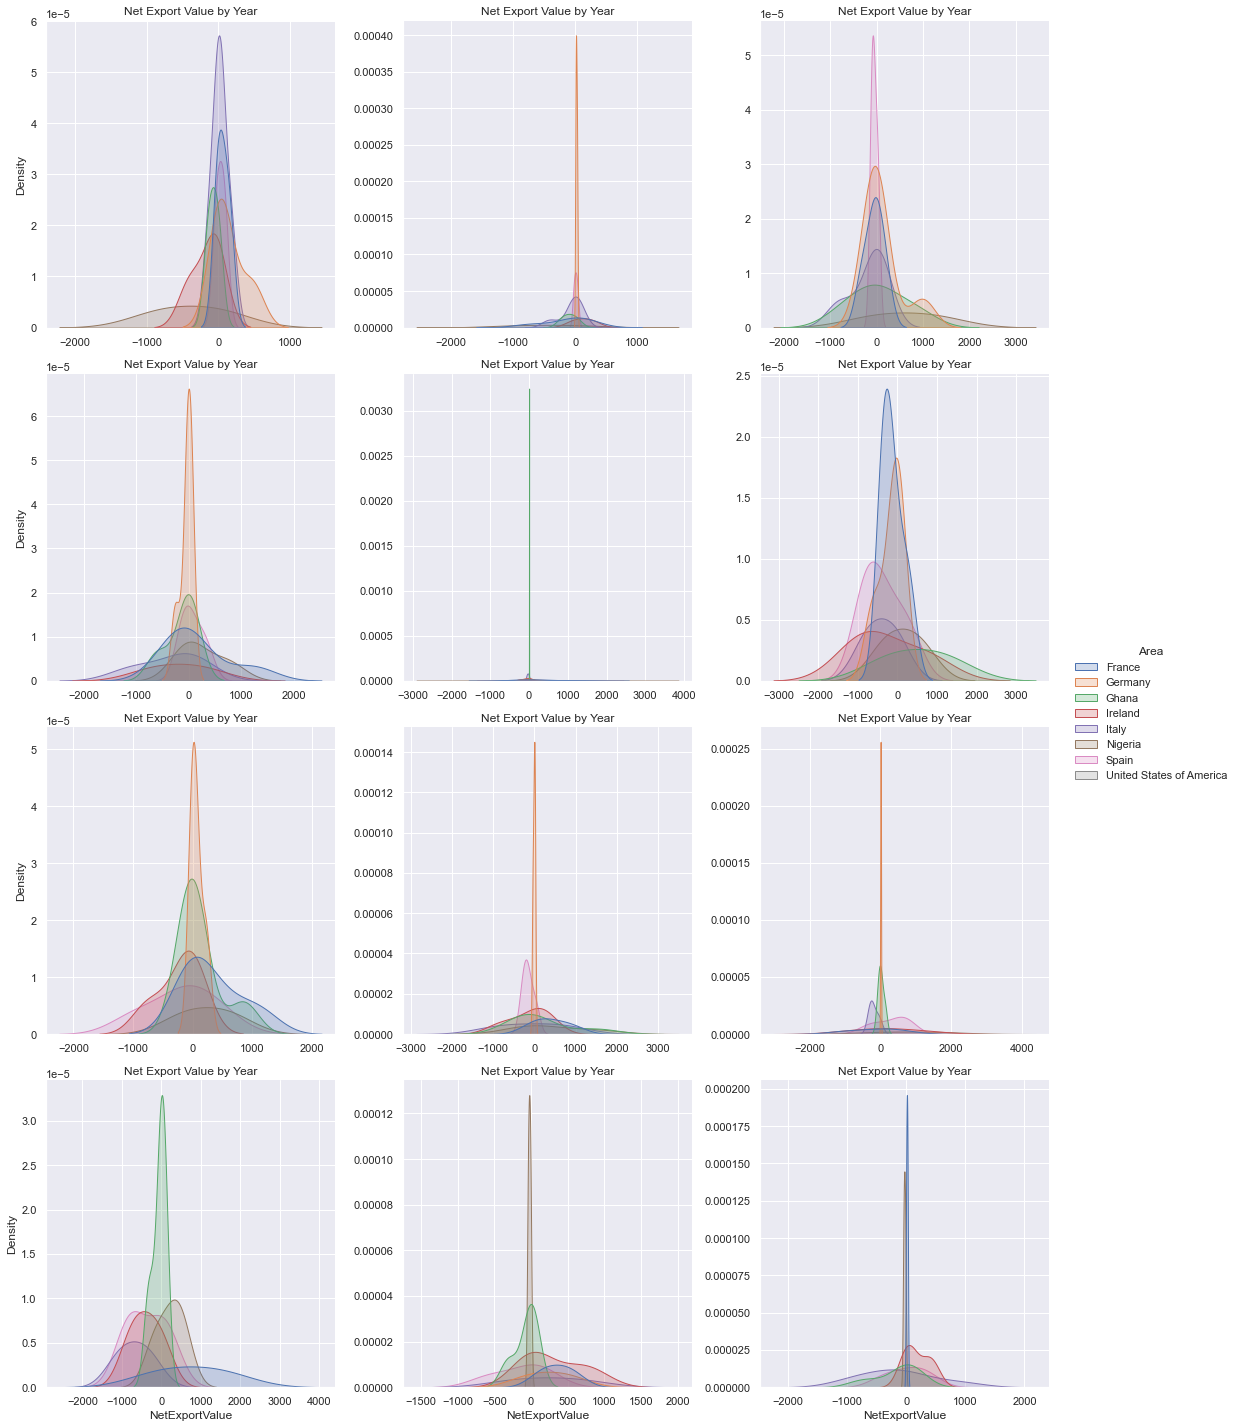

In [86]:
# plot distribution
ax = sns.displot(kind='kde', data=d, col='Year', col_wrap=3, x='NetExportValue', hue='Area', fill=True, facet_kws={'sharey': False, 'sharex': False})
ax.set(title='Net Export Value by Year')

# 2 Normality using Shapiro Wilk test
## Data come from a normal distribution
## Data does not come from a normal distribution
### p> 0.05 accept H0
### p< 0.05 reject H1

In [28]:
stats.shapiro(d.NetExportValue[data.Area == "Ireland"])

ShapiroResult(statistic=0.891944169998169, pvalue=0.010392749682068825)

In [29]:
stats.shapiro(d.NetExportValue[d.Area == "France"])

ShapiroResult(statistic=0.7642379403114319, pvalue=1.0458428505444317e-06)

In [30]:
stats.shapiro(d.NetExportValue[d.Area == "Germany"])

ShapiroResult(statistic=0.6454223394393921, pvalue=1.032261593536532e-06)

In [31]:
stats.shapiro(d.NetExportValue[d.Area == "Spain"])

ShapiroResult(statistic=0.7886198163032532, pvalue=3.2003441447159275e-05)

In [32]:
stats.shapiro(d.NetExportValue[d.Area == "Italy"])

ShapiroResult(statistic=0.823203980922699, pvalue=4.873083526035771e-05)

In [37]:
stats.shapiro(d.NetExportValue[d.Area == "United States of America"])

In [34]:
stats.shapiro(d.NetExportValue[d.Area == "Ghana"])

ShapiroResult(statistic=0.8452608585357666, pvalue=0.004444149788469076)

In [35]:
stats.shapiro(d.NetExportValue[d.Area == "Nigeria"])

ShapiroResult(statistic=0.9481078386306763, pvalue=0.5699145793914795)

In [36]:
#Check normality of all the variables
stats.shapiro(d.NetExportValue)

ShapiroResult(statistic=0.8245967626571655, pvalue=4.633585995363759e-14)

In [38]:
d['Area'].value_counts()

France                      41
Italy                       36
Spain                       31
Germany                     26
Ireland                     26
Ghana                       20
Nigeria                     13
United States of America     2
Name: Area, dtype: int64

# Test for Homogeneity 

In [39]:
#Checking variances with Levene
#filter Net Export Value for each countries
Ireland = d.NetExportValue[d.Area == 'Ireland']
Germany = d.NetExportValue[d.Area == 'Germany']
Spain = d.NetExportValue[d.Area == 'Spain']
France = d.NetExportValue[d.Area == 'France']
Italy = d.NetExportValue[d.Area == 'Italy']
USA = d.NetExportValue[d.Area == 'United States of America']
Ghana = d.NetExportValue[d.Area == 'Ghana']
Nigeria = d.NetExportValue[d.Area == 'Nigeria']

In [42]:
import scipy.stats as stats

In [44]:
import numpy as np
from scipy.stats import levene

In [45]:
levene(Ireland, Germany, Spain, France, Italy, USA, Nigeria, Ghana, center = 'mean')

LeveneResult(statistic=2.182327072819503, pvalue=0.03758745290614681)

In [ ]:
We reject because the P-value result is lower than 0.05 

# Determine if there is any significant difference in the average NetExportValue among the countries countries

In [151]:
d.groupby('Area').describe().T

Area                         France       Germany          Ghana  \
Year           count      45.000000  4.100000e+01      44.000000   
               mean     2014.777778  2.014146e+03    2016.068182   
               std         3.006726  2.987984e+00       3.259317   
               min      2010.000000  2.010000e+03    2010.000000   
               25%      2013.000000  2.012000e+03    2013.000000   
               50%      2014.000000  2.014000e+03    2016.000000   
               75%      2017.000000  2.016000e+03    2019.000000   
               max      2021.000000  2.021000e+03    2021.000000   
ImportValue    count      45.000000  4.100000e+01      44.000000   
               mean      368.822222  1.607317e+02     113.909091   
               std       926.605076  5.718243e+02     192.557671   
               min         0.000000  0.000000e+00       0.000000   
               25%        17.000000  0.000000e+00       1.000000   
               50%        40.000000  5.000000e+00      14.500000   
               75%       283.000000  6.700000e+01     135.250000   
               max      4024.000000  3.495000e+03     705.000000   
ExportValue    count      45.000000  4.100000e+01      44.000000   
               mean      496.755556  1.953171e+02     128.863636   
               std       955.411647  7.044296e+02     382.784145   
               min         0.000000  0.000000e+00       0.000000   
               25%         7.000000  5.000000e+00       0.000000   
               50%        50.000000  1.400000e+01       2.500000   
               75%       469.000000  9.400000e+01       7.000000   
               max      4092.000000  4.476000e+03    1579.000000   
ImportQuantity count      45.000000  4.100000e+01      44.000000   
               mean    53959.066667  6.018274e+05    8692.272727   
               std    132698.658369  2.508887e+06   22508.201138   
               min         0.000000  0.000000e+00       0.000000   
               25%        11.000000  2.238000e+03       1.000000   
               50%        26.000000  8.231000e+03      14.500000   
               75%       128.000000  7.641400e+04     116.250000   
               max    541038.000000  1.238943e+07   85309.000000   
ExportQuantity count      45.000000  4.100000e+01      44.000000   
               mean   110219.733333  2.406129e+05   19413.454545   
               std    223366.946715  3.143049e+05   49685.175374   
               min         1.000000  1.000000e+00       1.000000   
               25%        12.000000  5.184000e+03      93.500000   
               50%        95.000000  2.594700e+04    1588.500000   
               75%      6597.000000  3.284500e+05   14877.500000   
               max    671208.000000  8.655230e+05  271663.000000   
NetExportValue count      45.000000  4.100000e+01      44.000000   
               mean      127.933333  3.458537e+01      14.954545   
               std       486.833152  2.312875e+02     395.880764   
               min      -961.000000 -6.100000e+02    -705.000000   
               25%       -61.000000 -7.000000e+00     -90.250000   
               50%         2.000000  7.000000e+00      -1.500000   
               75%       285.000000  2.900000e+01       2.000000   
               max      1448.000000  9.810000e+02    1495.000000   

Area                       Ireland         Italy        Nigeria         Spain  \
Year           count  4.000000e+01  3.900000e+01      27.000000  4.300000e+01   
               mean   2.016500e+03  2.015179e+03    2015.592593  2.016116e+03   
               std    3.396831e+00  3.959478e+00       3.433537  3.193813e+00   
               min    2.010000e+03  2.010000e+03    2010.000000  2.010000e+03   
               25%    2.014000e+03  2.011500e+03    2013.000000  2.014000e+03   
               50%    2.017000e+03  2.015000e+03    2016.000000  2.016000e+03   
               75%    2.019250e+03  2.018500e+03    2018.500000  2.018500e+03   
               max 

# Visualising Net Export Value by Area Using Boxplot

<AxesSubplot:xlabel='NetExportValue', ylabel='Area'>

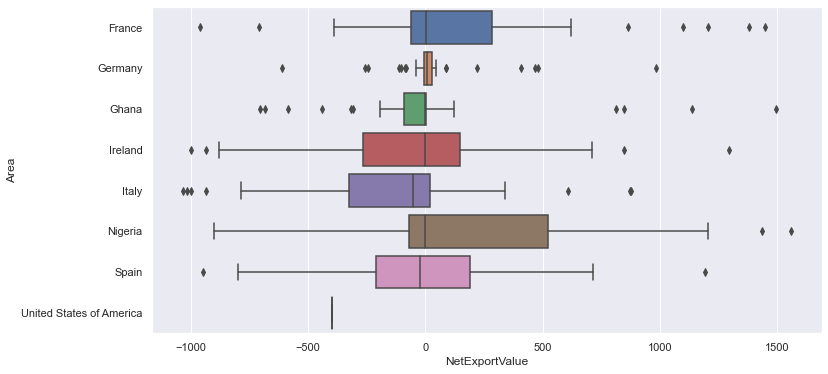

In [147]:
import seaborn as sb
sb.boxplot(x='NetExportValue', y='Area', data=d)

### Observation:
Ireland almost symetry but the start area on the lower half of the mediam seems to be greater than the area of on the upper  half of the media
with this we have the variation of how netexportvalue varies among the countries.

# ONE-WAY ANOVA


### step 1: The null hypothesis states that the mean Net Export Value is equal among all countries or is there a significant differnce among the NetAssetValue of the countries

### H0:μ1=μ2=μ3=μ4=μ5=μ6=μ7=8

### Alternative hypothesis
### H1:Not all the means are equal (Accept the Hypothesis when P-value is greater than 0.05)

### Step 2: Decide on the significance level, α

### α=0.05

In [152]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [153]:
#performing ANOVA
model = ols('NetExportValue~Area', data = d).fit()
aov_model = sm.stats.anova_lm(model, type = 2)
print(aov_model)

             df        sum_sq        mean_sq         F    PR(>F)
Area        7.0  2.895083e+06  413583.222827  2.120625  0.041697
Residual  272.0  5.304788e+07  195028.961177       NaN       NaN


# Multiple Comparison Test

In [154]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [155]:
mc=MultiComparison(d['NetExportValue'], d['Area'])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### Observation:
rejected = False means it is accepted, meaning there is no significant difference in the Net Export Value of the country
rejected = True means there is a significant difference in the Net Export Value of the country

# TWO-WAY ANOVA
## H0 = means are equal
## H1 = means are not equal

In [156]:
#ANOVA TWO WAYS
model2 = ols('NetExportValue~Area+Item', data = d).fit()
aov2_model = sm.stats.anova_lm(model2, type=2)
print(aov2_model)

             df        sum_sq        mean_sq         F        PR(>F)
Area        7.0  2.895083e+06  413583.222827  2.592514  1.337615e-02
Item       15.0  1.204871e+07  803247.621923  5.035094  1.078422e-08
Residual  257.0  4.099916e+07  159529.817554       NaN           NaN


# Assuming Normality Fail

## NonParametric Test: Kruskal-Wallis Test

#### We Assume no normal distribution
#### we do not assume varaince is equal
#### The null hypothesis (H0): The median is equal across all the countries.
#### The alternative hypothesis: (Ha): The median  Net Export Value differ for at least one country.

In [157]:
import scipy.stats as ss

In [158]:
#Kruskal-Wallis Test 
stats.kruskal(Ireland, Germany, Spain, France, Italy, USA)

KruskalResult(statistic=8.878915023123959, pvalue=0.11399239495626254)

In [58]:
co= pd.crosstab(d['NetExportValue'], d['Area']) 
co

Area            France  Germany  Ghana  Ireland  Italy  Nigeria  Spain  \
NetExportValue                                                           
-1140.0              0        0      0        0      0        0      0   
-1132.0              0        0      0        0      1        0      0   
-1047.0              0        0      0        0      1        0      0   
-1045.0              0        0      0        0      1        0      0   
-1040.0              0        0      0        0      1        0      0   
...                ...      ...    ...      ...    ...      ...    ...   
 3574.0              0        1      0        0      0        0      0   
 3722.0              1        0      0        0      0        0      0   
 3724.0              1        0      0        0      0        0      0   
 3826.0              0        0      0        1      0        0      0   
 3857.0              0        0      0        0      0        1      0   

Area            United States of America  
NetExportValue                            
-1140.0                                1  
-1132.0                                0  
-1047.0                                0  
-1045.0                                0  
-1040.0                                0  
...                                  ...  
 3574.0                                0  
 3722.0                                0  
 3724.0                                0  
 3826.0                                0  
 3857.0                                0  

[182 rows x 8 columns]

# Pearsoncorr Correlation

In [159]:
from scipy.stats.stats import pearsonr

In [160]:
#ImportValue = d['ImportValue'] 
#ExportValue = d['ExportValue']
#ImportQuantity = d['ImportQuantity']
#ExportQuantity = d['ExportQuantity']
#NetExportValue = d['NetExportValue']

In [161]:
pearsoncorr = d.corr(method='pearson')
pearsoncorr

Year  ImportValue  ExportValue  ImportQuantity  \
Year            1.000000    -0.077917    -0.037545       -0.162415   
ImportValue    -0.077917     1.000000     0.682394       -0.011245   
ExportValue    -0.037545     0.682394     1.000000        0.001709   
ImportQuantity -0.162415    -0.011245     0.001709        1.000000   
ExportQuantity -0.040328     0.173196     0.079649       -0.013015   
NetExportValue  0.040213    -0.250515     0.536726        0.015244   

                ExportQuantity  NetExportValue  
Year                 -0.040328        0.040213  
ImportValue           0.173196       -0.250515  
ExportValue           0.079649        0.536726  
ImportQuantity       -0.013015        0.015244  
ExportQuantity        1.000000       -0.094428  
NetExportValue       -0.094428        1.000000

<AxesSubplot:>

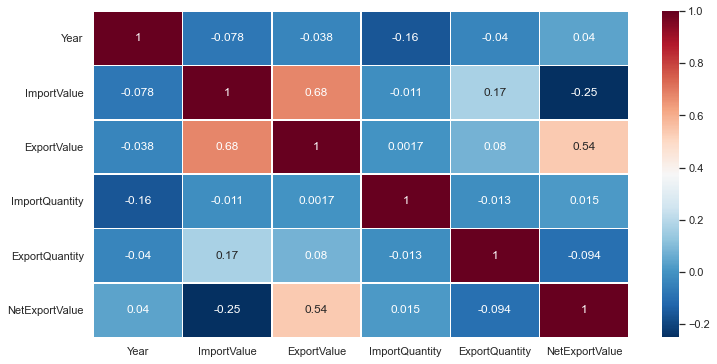

In [162]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

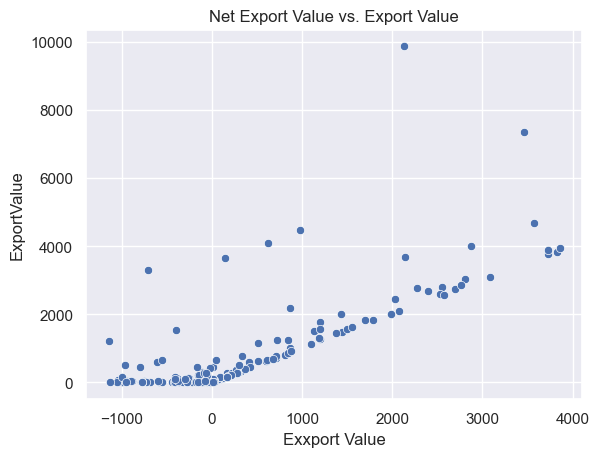

In [72]:
ax = sns.scatterplot(x="NetExportValue", y="ExportValue", data=d)
ax.set_title("Net Export Value vs. Export Value")
ax.set_xlabel("Exxport Value");

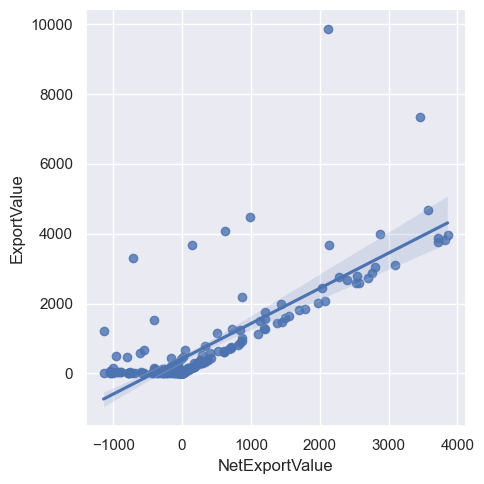

In [75]:
sns.lmplot(x="NetExportValue", y="ExportValue", data=d);

In [73]:
stats.pearsonr(d['NetExportValue'], d['ExportValue'])

PearsonRResult(statistic=0.7777914565168662, pvalue=8.753957762578409e-41)

## Spearmanr Correlation

In [67]:
from scipy.stats import spearmanr

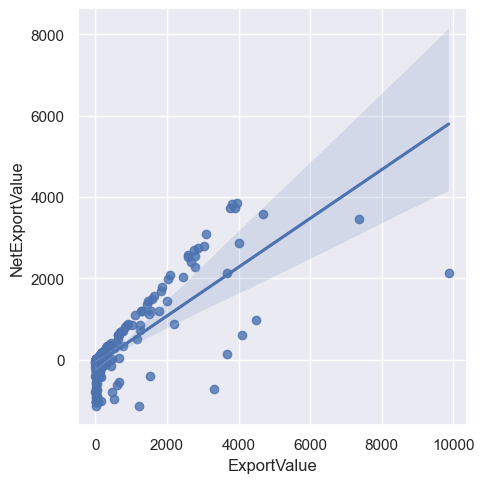

In [70]:
sns.lmplot(x="ExportValue", y="NetExportValue", data=d);

In [76]:
#calculate Spearman Rank correlation and corresponding p-value
da, p = spearmanr(d['NetExportValue'], d['ExportValue'])

#print Spearman rank correlation and p-value
print(da)

0.6899041019420359


In [77]:
print(p)

6.846147207791251e-29


## Observation:
Our P-value is greater than 0.05 for both Pearson and Spearman correlation therefore, we accept the hypothesis H1: There is a correlation between Export Value and its Net Export Value (equivalent to saying r ≠ 0),

# Relationship Analysis

In [166]:
#checking corelation matrix
corelation = d.corr()

<AxesSubplot:>

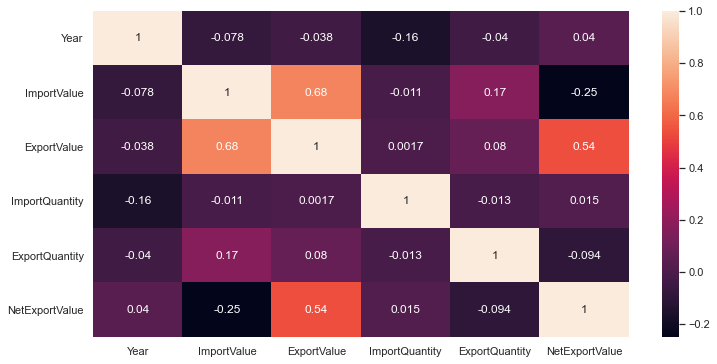

In [167]:
sns.heatmap (corelation, xticklabels = corelation.columns, yticklabels = corelation.columns
             ,annot=True)

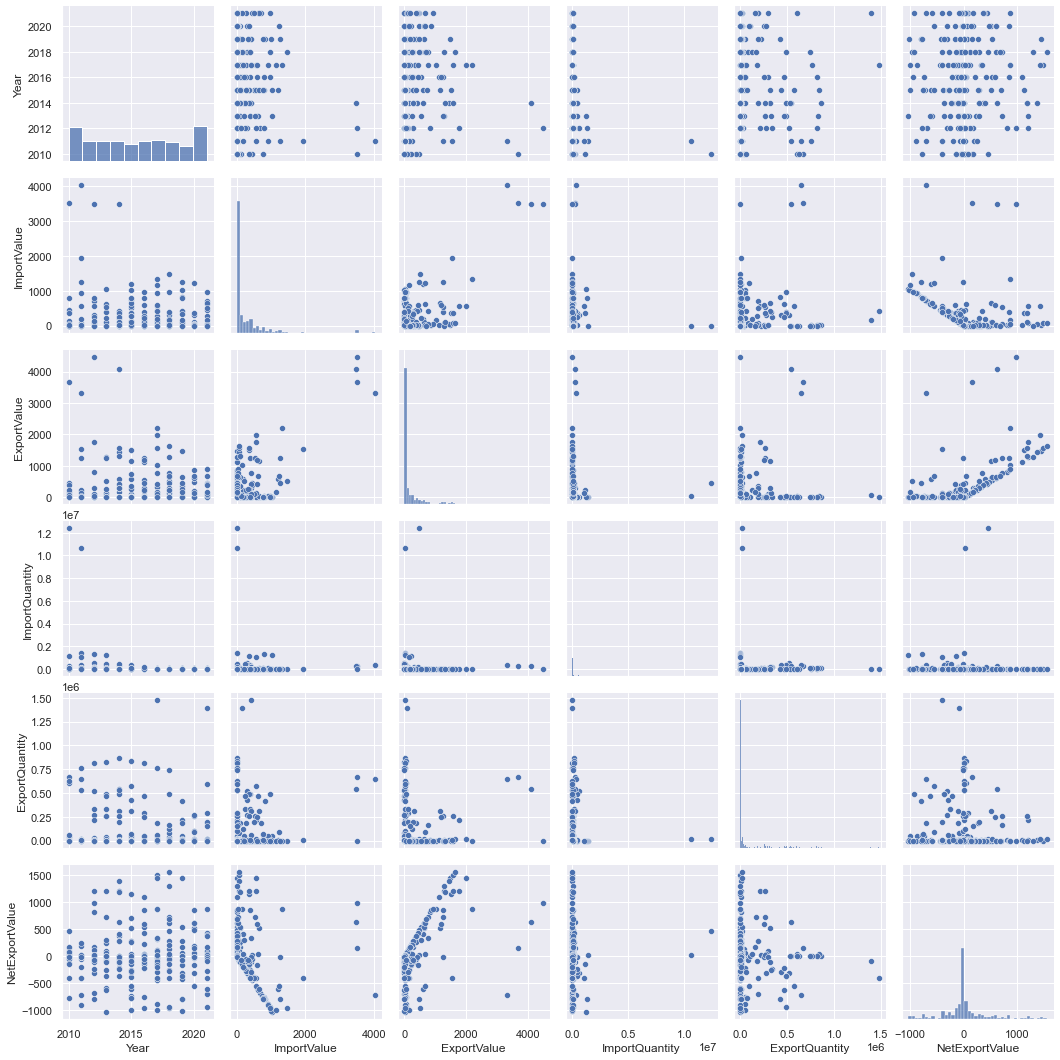

In [168]:
#Pairplot
sb.pairplot(d)

### What is the relationship between the Export Quantity of Agriculture Crops and its Export Value. How does this relationship vary by the Area?

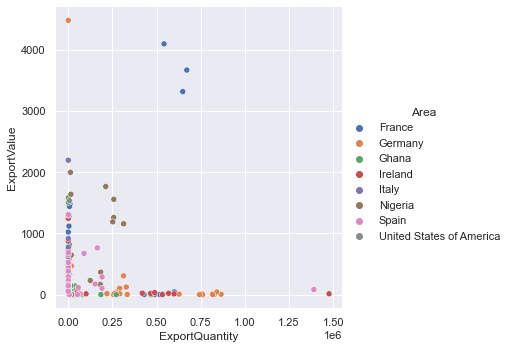

In [169]:
#plot based on Area
sns.relplot(x ='ExportQuantity', y ='ExportValue', hue = 'Area', data = d)

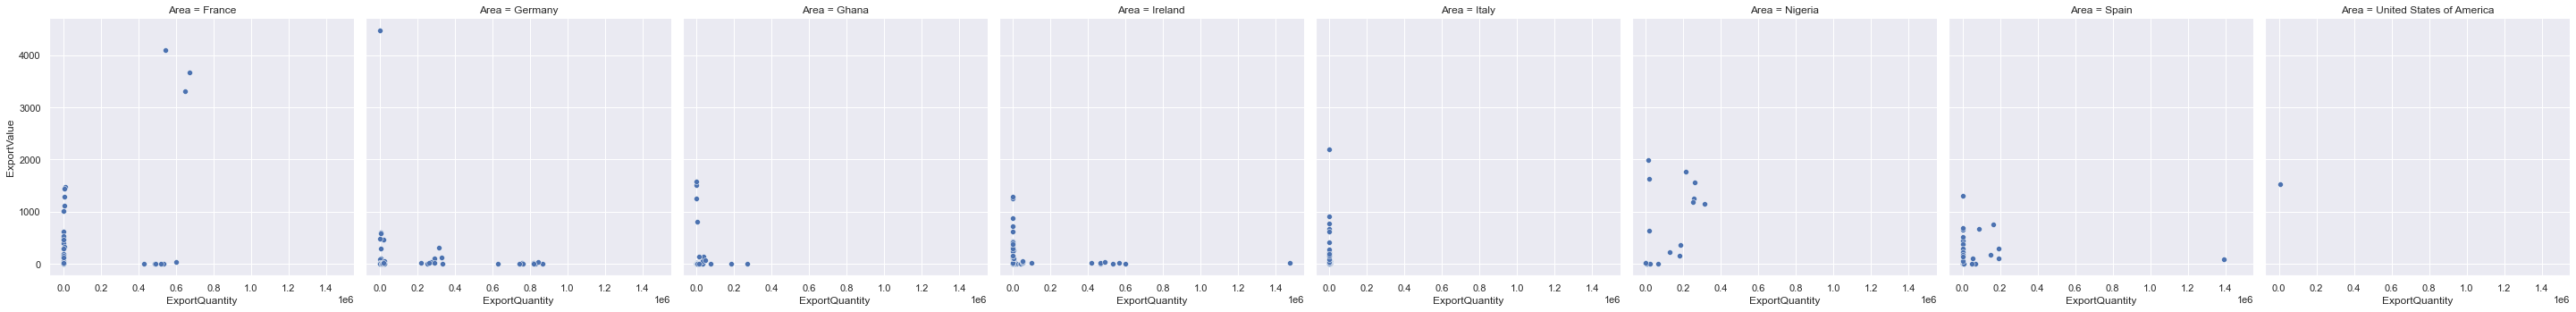

In [170]:
# Change to make subplots based on Area
sns.relplot(x="ExportQuantity", y="ExportValue", 
            data=d,
            kind="scatter",
            col="Area")

# Show plot
plt.show()

## Observation:
No correalstion of such between the countries for their export quantity and export value. The amonth of their quantity produce does not correlate with their value 

# Labelling

In [171]:
from sklearn.preprocessing import *
# labelling
cols = ['Item', 'Year', 'Area']
le = LabelEncoder()
for col in cols:
    d[col] = le.fit_transform(d[col])

In [172]:
d.head()

Item  Year      Unit  ImportValue    id  ExportValue  Area  ImportQuantity  \
0     0     0  1000 US$         38.0  ID_1         12.0     0            41.0   
1     0     1  1000 US$         79.0  ID_2         18.0     0            55.0   
2     0     2  1000 US$         47.0  ID_3          5.0     0            34.0   
3     0     3  1000 US$         69.0  ID_4          4.0     0            56.0   
4     0     4  1000 US$         40.0  ID_5         11.0     0            27.0   

   ExportQuantity  NetExportValue  
0             5.0           -26.0  
1            16.0           -61.0  
2             4.0           -42.0  
3             8.0           -65.0  
4            36.0           -29.0

# Splitting the data into train and test data

In [173]:
cols = ['ImportValue', 'ExportValue', 'ImportQuantity', 'ExportQuantity', 'Area','Item','Year']
X = d[cols]
y = d['NetExportValue']

In [174]:
X.isna().sum()

ImportValue       0
ExportValue       0
ImportQuantity    0
ExportQuantity    0
Area              0
Item              0
Year              0
dtype: int64

# Normalization

In [175]:
X_sc = StandardScaler().fit_transform(X)
X_sc

array([[-0.41161716, -0.42800256, -0.12949223, ..., -1.41333599,
        -1.46761745, -1.61895598],
       [-0.33215118, -0.41786718, -0.129478  , ..., -1.41333599,
        -1.46761745, -1.32248268],
       [-0.39417341, -0.43982717, -0.12949935, ..., -1.41333599,
        -1.46761745, -1.02600938],
       ...,
       [-0.48526856, -0.20671346, -0.12590753, ...,  1.53623477,
        -1.238046  ,  1.34577701],
       [-0.47945397, -0.1577258 , -0.12553848, ...,  1.53623477,
        -1.238046  ,  1.64225031],
       [ 3.26126166,  2.14131592, -0.12952172, ...,  2.02782989,
        -0.31976023, -1.32248268]])

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.33, random_state=42)

# Modelling

## Model 1 - Linear Regression

In [177]:
# Model 1 -  Linear Regression
from sklearn.linear_model import *
from sklearn.metrics import *
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_train_score = lr_model.score(X_train, y_train)
lr_test_score = lr_model.score(X_test, y_test)
print(f'Train Accuracy: {lr_train_score}')
print(f'Test Accuracy: {lr_test_score}')
# prediction
lr_pred = lr_model.predict(X_test)
# Check for Root mean square error
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
print(f'MSE:  {lr_mse}')
print(f'RMSE: {lr_rmse}')

Train Accuracy: 1.0
Test Accuracy: 1.0
MSE:  2.143179767193289e-25
RMSE: 4.629448959858278e-13


## Model 2 - Random Forest Regressor

In [178]:
# Model 2 -  Random Forest regressor
from sklearn.ensemble import *
from sklearn.metrics import *
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
rfr_train_score = rfr_model.score(X_train, y_train)
rfr_test_score = rfr_model.score(X_test, y_test)
print(f'Train Accuracy: {rfr_train_score}')
print(f'Test Accuracy: {rfr_test_score}')
# prediction
rfr_pred = rfr_model.predict(X_test)
# Check for Root mean square error
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(rfr_mse)
print(f'MSE:  {rfr_mse}')
print(f'RMSE: {rfr_rmse}')

Train Accuracy: 0.9789098163602254
Test Accuracy: 0.9639735739312905
MSE:  7315.756381720428
RMSE: 85.5321950011832


## Model 3 - Gradient Boosting REgressor

In [179]:
# Model 3 - Gradient Boosting Regressor 
from sklearn.metrics import *
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
gbr_train_score = gbr_model.score(X_train, y_train)
gbr_test_score = gbr_model.score(X_test, y_test)
print(f'Train Accuracy: {gbr_train_score}')
print(f'Test Accuracy: {gbr_test_score}')
# prediction
gbr_pred = gbr_model.predict(X_test)
# Check for Root mean square error
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_rmse = np.sqrt(gbr_mse)
print(f'MSE:  {gbr_mse}')
print(f'RMSE: {gbr_rmse}')

Train Accuracy: 0.9997325026127198
Test Accuracy: 0.8981123603746957
MSE:  20689.955433982093
RMSE: 143.84003418374905


## Model 4 - Lasso Regressor

In [180]:
# Model 4 - Lasso Regressor 
from sklearn.metrics import *
ls_model = Lasso()
ls_model.fit(X_train, y_train)
ls_train_score = ls_model.score(X_train, y_train)
ls_test_score = ls_model.score(X_test, y_test)
print(f'Train Accuracy: {ls_train_score}')
print(f'Test Accuracy: {ls_test_score}')
# prediction
ls_pred = ls_model.predict(X_test)
# Check for Root mean square error
ls_mse = mean_squared_error(y_test, ls_pred)
ls_rmse = np.sqrt(ls_mse)
print(f'MSE:  {ls_mse}')
print(f'RMSE: {ls_rmse}')

Train Accuracy: 0.999966754416798
Test Accuracy: 0.9999665589977496
MSE:  6.790743693490238
RMSE: 2.6059055419355164


## Model 5 - Xgboost Regressor

In [78]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-1.7.2-py3-none-win_amd64.whl (89.1 MB)


In [182]:
# Model 5 - Xgboost Regressor 
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_train_score = xgb_model.score(X_train, y_train)
xgb_test_score = xgb_model.score(X_test, y_test)
print(f'Train Accuracy: {ls_train_score}')
print(f'Test Accuracy: {ls_test_score}')
# prediction
xgb_pred = xgb_model.predict(X_test)
# Check for Root mean square error
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
print(f'MSE:  {xgb_mse}')
print(f'RMSE: {xgb_rmse}')

Train Accuracy: 0.999966754416798
Test Accuracy: 0.9999665589977496
MSE:  13942.397774697296
RMSE: 118.07793093841582


## Model 6 - Decision Tree REgressor

In [183]:
# Model 6 - Decision Tree REgressor
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
svr_model = DecisionTreeRegressor()
svr_model.fit(X_train, y_train)
svr_train_score = svr_model.score(X_train, y_train)
svr_test_score = svr_model.score(X_test, y_test)
print(f'Train Accuracy: {svr_train_score}')
print(f'Test Accuracy: {svr_test_score}')
# prediction
svr_pred = svr_model.predict(X_test)
# Check for Root mean square error
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
print(f'MSE:  {svr_mse}')
print(f'RMSE: {svr_rmse}')

Train Accuracy: 1.0
Test Accuracy: 0.8960355913934946
MSE:  21111.677419354837
RMSE: 145.29858023860672


# Model Analysis

In [184]:
models = pd.DataFrame()

In [185]:
label = ['Linear Regression', 'Random Forest regressor','Gradient Boosting Regressor','Lasso Regressor','Xtreme boost Regressor','Decision Tree REgressor']
train_acc = [lr_train_score, rfr_train_score, gbr_train_score, lr_train_score, xgb_train_score, svr_train_score]
test_acc = [lr_test_score, rfr_test_score, gbr_test_score, lr_test_score, xgb_test_score, svr_test_score]
mse = [lr_mse, rfr_mse, gbr_mse, lr_mse, xgb_mse, svr_mse]
rmse = [lr_rmse, rfr_rmse, gbr_rmse, lr_rmse, xgb_rmse, svr_rmse]

In [186]:
models['label'] = label
models['Training Accuracy'] = train_acc
models['Test Accuracy'] = test_acc
models['Mean Squrad Error'] = mse
models['Root Mean Squrad Error'] = rmse
models

label  Training Accuracy  Test Accuracy  \
0            Linear Regression           1.000000       1.000000   
1      Random Forest regressor           0.978910       0.963974   
2  Gradient Boosting Regressor           0.999733       0.898112   
3              Lasso Regressor           1.000000       1.000000   
4       Xtreme boost Regressor           1.000000       0.931341   
5      Decision Tree REgressor           1.000000       0.896036   

   Mean Squrad Error  Root Mean Squrad Error  
0       2.143180e-25            4.629449e-13  
1       7.315756e+03            8.553220e+01  
2       2.068996e+04            1.438400e+02  
3       2.143180e-25            4.629449e-13  
4       1.394240e+04            1.180779e+02  
5       2.111168e+04            1.452986e+02

## Observation:
We’ve cleaned the data, removed all the outliers and generated new features and six supervised model was build to analyze the dataset 

The first one is linear regression
The second one is random forest regressor
Third one is gradient boosting regressor 
The fourth one is lassos regressor 
The fifth one is extreme gradient boosting regressor 
The sixth one is decision tree regressor.

We used the following metrics to calculate the Model: 
The first one is training accuracy 
The Second is the test accuracy 
The mean squared error is the least squared error the model could get and the lower mean squared error means the model is performing better but with that we we still get a higher value which is why we use 
the root mean squared error so we have the metrics for the training accuracy, the test accuracy, the root mean squared error, and the mean squared error.
We’ll be using the best training accuracy that is if the accuracy is one (1) or let’s say 0.9, so how this is done is by comparing the training accuracy with the test accuracy if the difference is not far fetched that is okay